In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 加载数据
data = pd.read_csv('covtype.data', header=None)
# 分割特征和标签
X = data.iloc[:, :-1].values  # 所有列直到倒数第二列都是特征
y = data.iloc[:, -1].values  # 最后一列是标签
y_adjusted = y - 1  # 调整类别编号，使类别从0开始
# 数据预处理：标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_adjusted, test_size=0.2, random_state=42, stratify=y_adjusted)

In [4]:
# 构建MLP模型
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))  # 输入层，128个节点，激活函数为ReLU
model.add(Dense(64, activation='relu'))  # 隐藏层，64个节点
model.add(Dense(7, activation='softmax'))  # 输出层，7个节点对应7个类别，激活函数为Softmax

D:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# 编译模型
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
# 训练模型
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 13s 817us/step - accuracy: 0.7501 - loss: 0.5916 - val_accuracy: 0.8058 - val_loss: 0.4488
Epoch 2/100
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 12s 829us/step - accuracy: 0.8244 - loss: 0.4161 - val_accuracy: 0.8450 - val_loss: 0.3719
Epoch 3/100
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 12s 807us/step - accuracy: 0.8454 - loss: 0.3689 - val_accuracy: 0.8575 - val_loss: 0.3469
Epoch 4/100
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 12s 815us/step - accuracy: 0.8606 - loss: 0.3385 - val_accuracy: 0.8642 - val_loss: 0.3300
Epoch 5/100
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 12s 816us/step - accuracy: 0.8687 - loss: 0.3208 - val_accuracy: 0.8735 - val_loss: 0.3107
Epoch 6/100
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 12s 815us/step - accuracy: 0.8754 - loss: 0.3056 - val_accuracy: 0.8752 - val_loss: 0.3087
Epoch 7/100
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 12s 820us/step - accuracy: 0.8790 - loss: 0.2957 - val_accuracy: 0.8708 - val_loss: 0.3155
Epoch 8/100
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 12s

In [7]:
# 评估模型
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 2s 615us/step - accuracy: 0.9222 - loss: 0.2006
Test accuracy: 92.29%


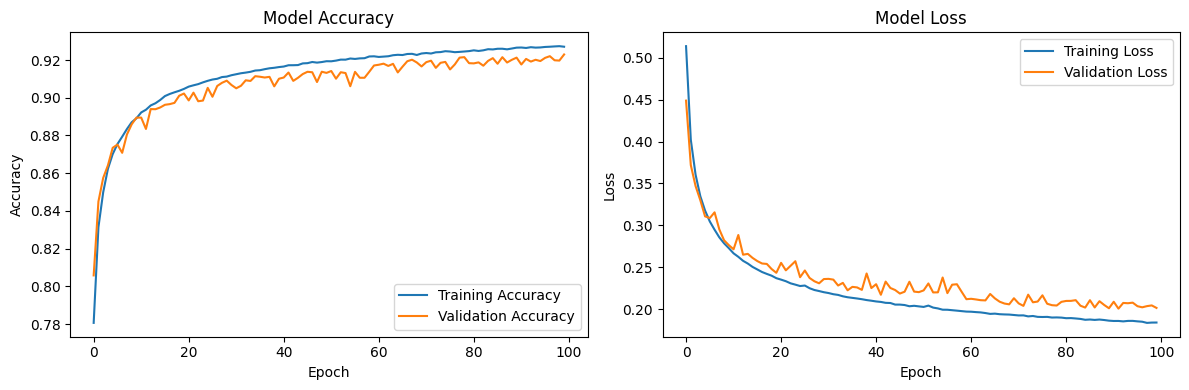

In [8]:
# 绘制训练和验证的准确率
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# 绘制训练和验证的损失
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [9]:
# 预测
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 3s 677us/step


In [10]:
# 评估报告
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     42368
           1       0.93      0.94      0.94     56661
           2       0.92      0.93      0.92      7151
           3       0.84      0.76      0.80       549
           4       0.80      0.76      0.78      1899
           5       0.84      0.87      0.85      3473
           6       0.89      0.96      0.92      4102

    accuracy                           0.92    116203
   macro avg       0.88      0.87      0.88    116203
weighted avg       0.92      0.92      0.92    116203



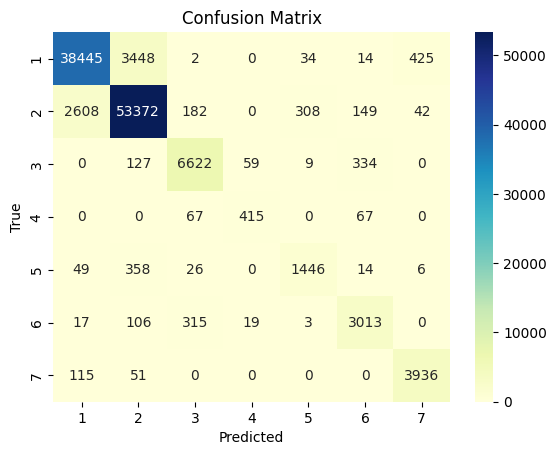

In [11]:
# 混淆矩阵
cm = confusion_matrix(y_test, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=np.arange(1, 8), yticklabels=np.arange(1, 8))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()